<a href="https://colab.research.google.com/github/mksv9871234/netflix-content-analysis.github.io/blob/main/Netflix_movie%26show_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Goal</h3>
  1. Understand the content available on Netflix by exploring key features such as type, genre, release year, and duration.


2. Identify patterns and trends in movie and TV show releases over the years.


3. Analyze the distribution of content by:

    *  Country
    *  Genre
    *  Rating
    *  Duration


4. Find the most active directors, actors, and producers on the Netflix platform.


5. Explore how Netflix’s content has evolved with time, and how content is distributed globally.


6. Perform data cleaning and preprocessing to handle missing or inconsistent data using Pandas.


7. Visualize insights using Matplotlib and Seaborn for:

      Top contributing countries

      Year-wise content trends

      Genre distribution

      Correlation heatmaps



8. Draw meaningful business insights that can help in understanding audience behavior and Netflix’s global content strategy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
License(s): CC0-1.0
  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 553MB/s]


In [ ]:
!unzip netflix-shows.zip -d data/

Archive:  netflix-shows.zip
  inflating: data/netflix_titles.csv  


In [ ]:
df = pd.read_csv('/content/data/netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
853,s854,Movie,Army of the Dead,Zack Snyder,"Dave Bautista, Ella Purnell, Omari Hardwick, G...",United States,"May 21, 2021",2021,R,148 min,"Action & Adventure, Horror Movies","After a zombie outbreak in Las Vegas, a group ..."
3434,s3435,Movie,The Influence,Dennis Rovira van Boekholt,"Manuela Vellés, Maggie Civantos, Alain Hernánd...","Spain, France","October 11, 2019",2019,TV-MA,102 min,"Horror Movies, International Movies",Back in her childhood home to help her sister ...
2060,s2061,Movie,Always Be My Maybe,Dan Villegas,"Gerald Anderson, Arci Muñoz, Cacai Bautista, R...",Philippines,"September 1, 2020",2016,TV-14,112 min,"International Movies, Romantic Movies",After being unexpectedly dumped by their respe...
2188,s2189,Movie,Sugar High,Ariel Boles,Hunter March,United States,"July 31, 2020",2020,TV-G,44 min,Children & Family Movies,"Talented sugar artists compete for $10,000 ove..."
3626,s3627,Movie,Misfit,Erwin van den Eshof,"Djamila, Niek Roozen, Bente Fokkens, Jolijn He...",Netherlands,"August 3, 2019",2017,TV-14,81 min,"Children & Family Movies, Comedies, Internatio...","After living in America for years, a teenage g..."
2857,s2858,TV Show,Calico Critters Mini Episodes Clover,NaN,"Stephanie Sheh, Erika Harlacher, Julie Maddale...",NaN,"March 1, 2020",2020,TV-Y,1 Season,Kids' TV,From throwing parties to planning fashion show...
936,s937,TV Show,Miniforce: Super Dino Power,NaN,NaN,NaN,"May 1, 2021",2020,TV-Y7,1 Season,Kids' TV,Animals with special powers transform into sup...
7435,s7436,TV Show,Mega Food,NaN,NaN,United Kingdom,"July 12, 2019",2013,TV-G,1 Season,"British TV Shows, Docuseries, International TV...","Visiting the busiest kitchens in the world, th..."
929,s930,Movie,Dead Again in Tombstone,Roel Reiné,"Danny Trejo, Jake Busey, Elysia Rotaru, Dean M...",NaN,"May 1, 2021",2017,R,99 min,"Action & Adventure, Horror Movies","At the devil's bidding, a deceased outlaw retu..."
144,s145,Movie,House Party,Reginald Hudlin,"Christopher Reid, Christopher Martin, Robin Ha...",United States,"September 1, 2021",1990,R,104 min,"Comedies, Cult Movies","Grounded by his strict father, Kid risks life ..."


In [ ]:
df.replace(['NaN','nan','NULL','null','none',''], np.nan, inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['rating'].mode()[0]

'TV-MA'

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [ ]:
df['duration'].mode()[0]

'1 Season'

In [ ]:
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

In [ ]:
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
# Group by country and get the most frequent director
most_common_directors = (
    df.dropna(subset=['director'])  # ignore rows where director is missing
      .groupby('country')['director']
      .agg(lambda x: x.mode()[0])   # mode() returns most frequent director
)


In [ ]:
most_common_directors

,director
country,
", France, Algeria",Najwa Najjar
Argentina,"Raúl Campos, Jan Suter"
"Argentina, Brazil, France, Poland, Germany, Denmark",Diego Lerman
"Argentina, Chile","Cecilia Atán, Valeria Pivato"
"Argentina, Chile, Peru",Ticoy Rodriguez
...,...
Venezuela,Matías Gueilburt
"Venezuela, Colombia",Jorge Granier
Vietnam,"Bao Nhan, Namcito"


In [ ]:
# Define a function to apply row-wise
def fill_director(row):
    if pd.isna(row['director']):
        return most_common_directors.get(row['country'], 'Unknown')  # fallback = 'Unknown'
    else:
        return row['director']

# Apply it to the DataFrame
df['director'] = df.apply(fill_director, axis=1)


In [ ]:
# Step 1: Create most common cast per (country, director)
cast_map = (
    df.dropna(subset=['cast'])
      .groupby(['country', 'director'])['cast']
      .agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
)

# Step 2: Define fill logic
def fill_cast(row):
    if pd.isna(row['cast']):
        return cast_map.get((row['country'], row['director']), 'Unknown')
    return row['cast']

df['cast'] = df.apply(fill_cast, axis=1)


In [ ]:
df['country'].mode()[0]

'United States'

In [ ]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

Count total movies vs TV shows, visualize using a bar chart

<Axes: xlabel='type'>

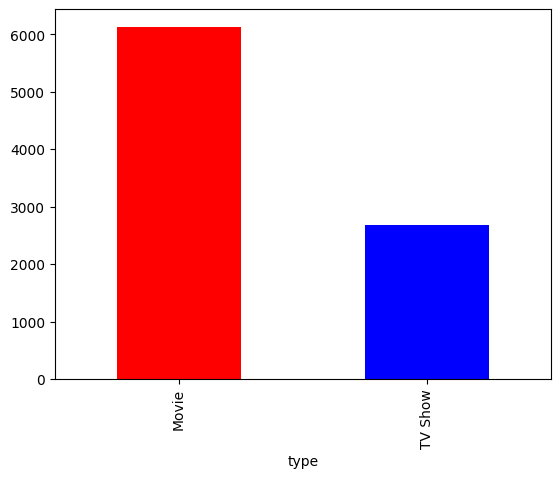

In [ ]:
df['type'].value_counts().plot(kind='bar', color=['red','blue'])

In [ ]:

display(HTML('''

<h2 style="background-color:green; color:white; padding:20px;text-align:center; border-radius:5px;">
  ✅ Analyze content over the year
</h2>

'''))


<Axes: xlabel='release_year'>

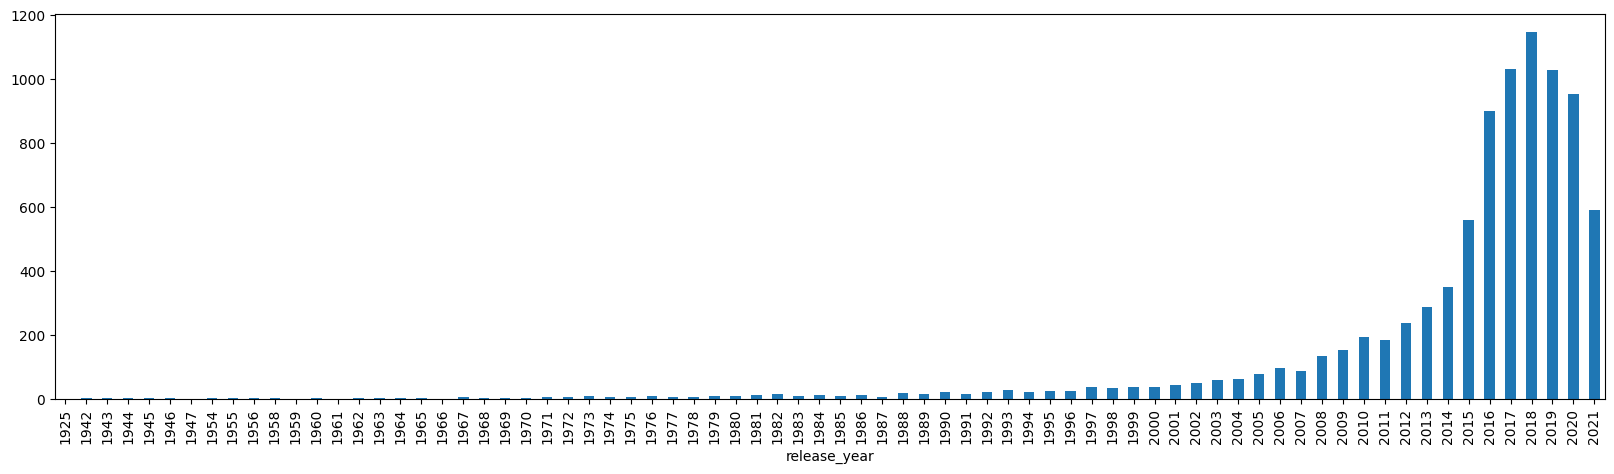

In [ ]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(20,5))

By analyzing this bar chart, we observe a clear upward trend in content releases year by year. The highest number of content releases occurred in 2018, marking the peak in the dataset. However, there is a noticeable decline in the number of releases after 2018.
This drop can be attributed to the COVID-19 pandemic period (2019–2020), which significantly disrupted global production and release schedules across the entertainment industry.

<h2>Content Distribution by country</h2>

Top 10 countries with most content

<Axes: ylabel='country'>

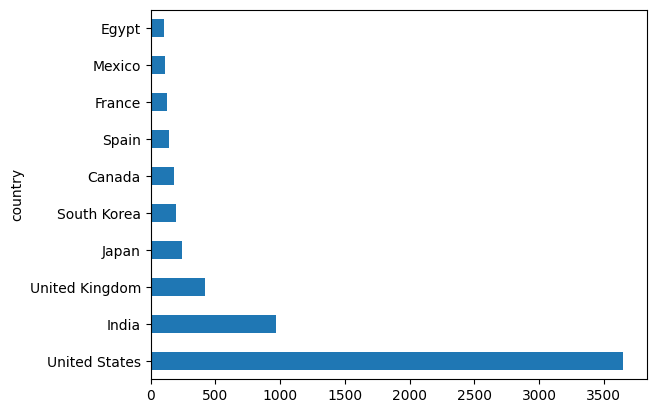

In [ ]:
df['country'].value_counts().head(10).plot(kind='barh')

By analyzing the bar chart, we observe that over 3,500 titles on Netflix originate from the United States, making it the leading content contributor on the platform.
The second-highest contributor is India, reflecting its rapidly growing entertainment industry and audience demand.
The United Kingdom ranks third, showcasing its significant role in Netflix's global content library.
These three countries — the U.S., India, and the U.K. — are key markets for Netflix, both in terms of content creation and audience reach.

<h2>Genre Distribution</h2>

top 10 genres

<Axes: ylabel='None'>

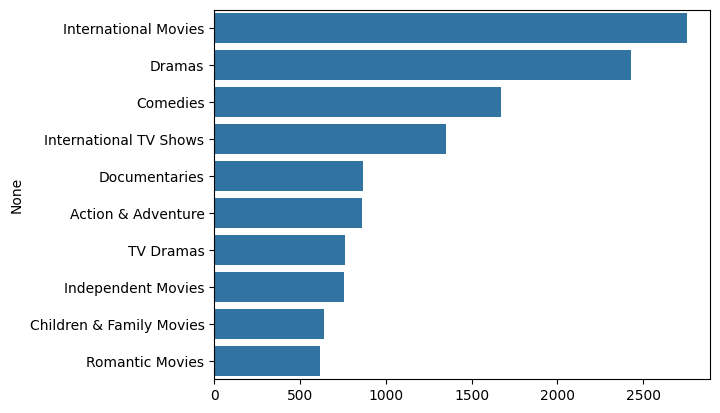

In [ ]:
genres = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
sns.barplot(x=genres.values, y=genres.index)

By analyzing the chart, we found that the most popular content categories on Netflix include:
International Movies, Dramas, Comedies, and International TV Shows.
These genres consistently appear across a wide range of titles, indicating that audiences worldwide prefer engaging stories, humor, and diverse international content.
The dominance of these categories also reflects Netflix’s focus on global storytelling and catering to varied cultural preferences.

<h3>America, India and United kingdom countries most hieghest genres

In [ ]:
# Group by country and find the most frequent genre for each
most_frequent_genre_by_country = top_countries_df.groupby('country')['listed_in'].apply(
    lambda x: x.str.split(', ', expand=True).stack().value_counts().idxmax()
)

display(most_frequent_genre_by_country)

,listed_in
country,
India,International Movies
United Kingdom,British TV Shows
United States,Dramas


<h4>Analyzing the genre preferences by country reveals interesting patterns:</4>

In India, the most-watched category is International Movies, showing a strong interest in global content.

In the United States, viewers tend to enjoy British TV Shows, indicating a cultural appreciation for UK-based storytelling and production.

In the United Kingdom, the dominant genre is Dramas, reflecting the country’s rich tradition in dramatic arts and series.

<h2>Most Frequent Directors and Acotrs </h2>

top 10 directors and castt members

<Axes: title={'center': 'Top 10 Directors'}, ylabel='director'>

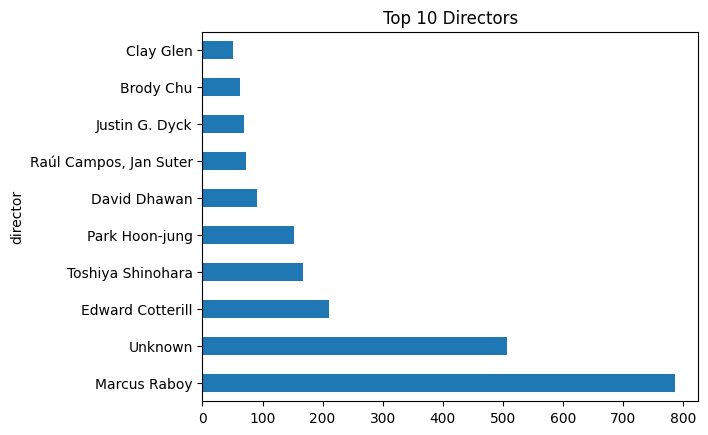

In [ ]:
top_directors = df['director'].value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors')

By analyzing the chart, we observe that Marcus Raboy ranks at the top among the most featured directors on Netflix.
This indicates that he has directed a significant number of movies or shows available on the platform.
His frequent appearances suggest either a strong partnership with Netflix or a high demand for his style of content.
Other directors in the top 10 also have multiple contributions, highlighting the platform's collaboration with prolific creators.

<Axes: title={'center': 'Top 10 Cast Members'}, ylabel='cast'>

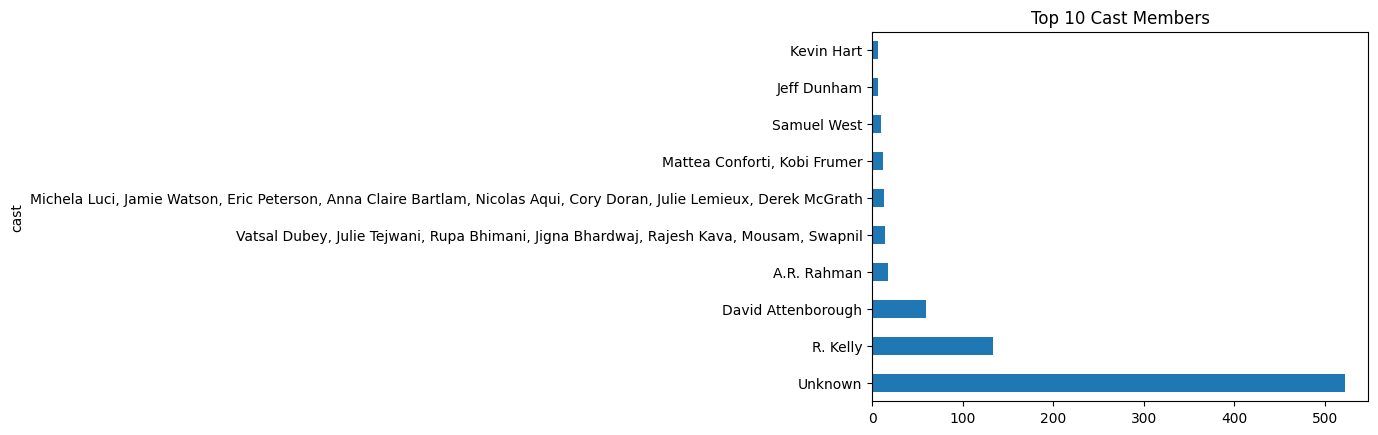

In [ ]:
top_cast = df['cast'].value_counts().head(10)
top_cast.plot(kind='barh', title='Top 10 Cast Members')

By analyzing the chart, we found that the most frequent cast member is listed as "Unknown", which indicates that many titles in the dataset are missing proper cast information.
The second most featured individual is R. Kelly, appearing in multiple Netflix titles.
This suggests that while some cast data may be incomplete, the chart still highlights key individuals who appear frequently across the platform's content.

<h2>Movies Duration

<Axes: ylabel='duration'>

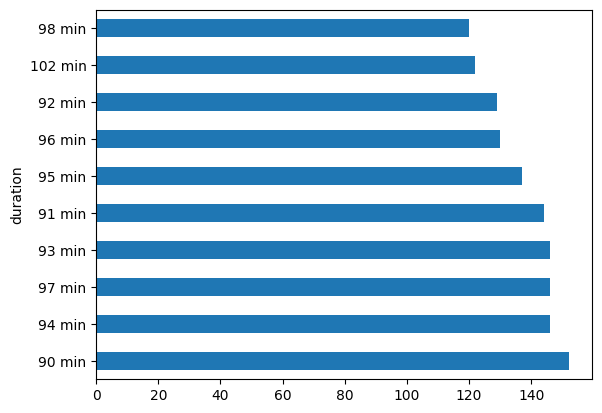

In [ ]:
df_movies = df[df['type'] == 'Movie']
df_movies['duration'].value_counts().head(10).plot(kind='barh')

<h2>Correlation between content release year and year of added

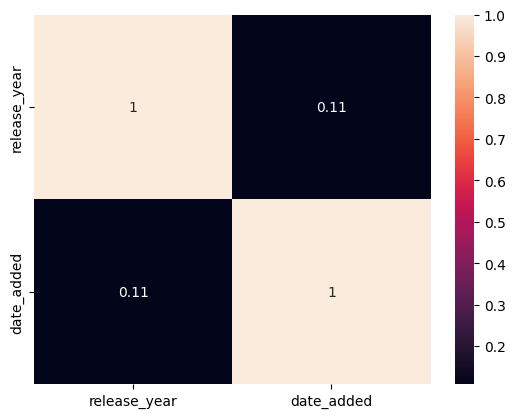

In [ ]:
sns.heatmap(df[['release_year', 'date_added']].corr(),annot=True)
plt.show()

The heatmap shows the correlation between the release_year and date_added columns. The value in the heatmap (0.13) indicates a weak positive correlation between these two variables.

This means that there is a slight tendency for movies and TV shows released in later years to be added to Netflix more recently. However, the correlation is quite low, suggesting that there isn't a strong linear relationship between the release year of a title and when it was added to the platform. Many older titles are also added to Netflix, and some newer titles might have a delay before being added.

In [ ]:
display(HTML('''

<h2 style="background-color:green; color:white; padding:20px;text-align:center; border-radius:5px;">
   Final : Summary and Insights: Netflix Content Analysis
</h2>


'''))


<h3> Content Volume</h3>
<ul>
  <li><strong>Insight:</strong> Netflix has a significantly higher number of <strong>movies</strong> compared to <strong>TV shows</strong>, highlighting that movies are a major part of Netflix's content strategy.</li>
  <li><strong>Business Usefulness:</strong> This helps Netflix understand its current content mix and guide future content acquisition and production. If the goal is to increase TV show viewership, they may need to invest more in high-quality series.</li>
</ul>

<h3> Content Release Trends</h3>
<ul>
  <li><strong>Insight:</strong> There was an upward trend in content releases until <strong>2018</strong>, followed by a decline likely caused by the <strong>COVID-19 pandemic</strong>.</li>
  <li><strong>Business Usefulness:</strong> This insight helps Netflix recognize external factors affecting content availability and plan future production schedules to avoid content gaps.</li>
</ul>

<h3> Content Distribution by Country</h3>
<ul>
  <li><strong>Insight:</strong> The <strong>United States</strong>, <strong>India</strong>, and the <strong>United Kingdom</strong> are the top three countries contributing to Netflix's content library.</li>
  <li><strong>Business Usefulness:</strong> These key markets are crucial for content investment and regional localization strategies. Netflix can focus on tailoring content and marketing efforts to these audiences.</li>
</ul>

<h3> Genre Distribution</h3>
<ul>
  <li><strong>Insight:</strong> The most popular global genres are:
    <ul>
      <li>International Movies</li>
      <li>Dramas</li>
      <li>Comedies</li>
      <li>International TV Shows</li>
    </ul>
  </li>
  <li><strong>Business Usefulness:</strong> This helps Netflix prioritize content investments to align with viewer demand and retain subscribers.</li>
</ul>

<h3> Genre Preferences by Country</h3>
<ul>
  <li><strong>India:</strong> International Movies</li>
  <li><strong>United States:</strong> British TV Shows</li>
  <li><strong>United Kingdom:</strong> Dramas</li>
  <li><strong>Insight:</strong> Genre preferences vary by region, showing the importance of <strong>localized content strategies</strong>.</li>
  <li><strong>Business Usefulness:</strong> Netflix can curate content libraries and commission productions that align with genre popularity in specific markets.</li>
</ul>

<h3> Most Frequent Directors and Cast</h3>
<ul>
  <li><strong>Insight:</strong> <strong>Marcus Raboy</strong> is the most frequent director on Netflix. The most frequent cast member is listed as "<strong>Unknown</strong>" (due to missing data), followed by <strong>R. Kelly</strong>.</li>
  <li><strong>Business Usefulness:</strong> Netflix can use this to identify prolific creators for future collaborations. It also highlights the need for improved data quality, especially in cast information.</li>
</ul>

<h3> Movie Duration Distribution</h3>
<ul>
  <li><strong>Insight:</strong> Most movies on Netflix fall within a typical duration range, indicating audience preferences for movie length.</li>
  <li><strong>Business Usefulness:</strong> This helps guide decisions about what length of content to produce or acquire.</li>
</ul>

<h3> Correlation Between Release Year and Added Date</h3>
<ul>
  <li><strong>Insight:</strong> There is a weak positive correlation. While newer titles are slightly more likely to be added recently, Netflix also adds older titles to its library.</li>
  <li><strong>Business Usefulness:</strong> This reflects Netflix’s strategy of offering both fresh and classic content to cater to a wide range of viewers.</li>
</ul>

<h2> Business Usefulness of Visualizations</h2>
<ul>
  <li><strong>Content Strategy:</strong> Helps refine acquisition and production by identifying popular genres and countries.</li>
  <li><strong>Targeted Marketing:</strong> Enables country-specific and genre-based campaigns.</li>
  <li><strong>Audience Understanding:</strong> Improves recommendations and user engagement through deeper insights.</li>
  <li><strong>Data Quality Improvement:</strong> Highlights areas (like missing cast info) that need cleaning for better analytics.</li>
  <li><strong>Competitive Advantage:</strong> Helps Netflix stay ahead by spotting trends and user behavior shifts.</li>
</ul>

<h3> Final Note</h3>
<p>
  These visualizations offer valuable, actionable insights into Netflix’s content strategy, user preferences, and business opportunities. By leveraging this data, Netflix can continue to make informed decisions to enhance user experience and stay competitive in the global streaming industry.
</p>
